In [1]:
#Aim: Understand moving average, exponential smoothing, stationarity, autocorrelation, SARIMA, and apply these techniques in projects.

#Seasonality - Seasonality refers to periodic fluctuations. Seasonality can also be derived from an autocorrelation plot if it has a sinusoidal shape.

#Stationarity - A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.
#Dicky Fuller test is used to test if the process is stationary. P>0, not stationary. p=0, stationary


In [2]:
#Exponential Smoothing: - A different decreasing weight is assigned to each observations. In other words, less importance is given to observations as we move further from the present.


# Predicting Stock price

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
data = pd.read_csv('GF.csv',index_col=['Date'], parse_dates = ['Date'])
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-16,13.29,13.49,13.29,13.36,12.317332,14400
2022-02-17,13.25,13.25,12.90,12.90,11.893232,23600
2022-02-18,12.90,13.13,12.66,12.81,11.810257,13000
2022-02-22,12.58,12.65,12.31,12.41,11.441474,17300
2022-02-23,12.45,12.47,12.25,12.27,11.312401,11600


In [10]:
#Removing unwanted entries
drop_cols = ['Open','High','Low','Adj Close','Volume']
data.drop(drop_cols, axis=1, inplace=True)
data.head()

,Close
Date,
2022-02-16,13.36
2022-02-17,12.90
2022-02-18,12.81
2022-02-22,12.41
2022-02-23,12.27


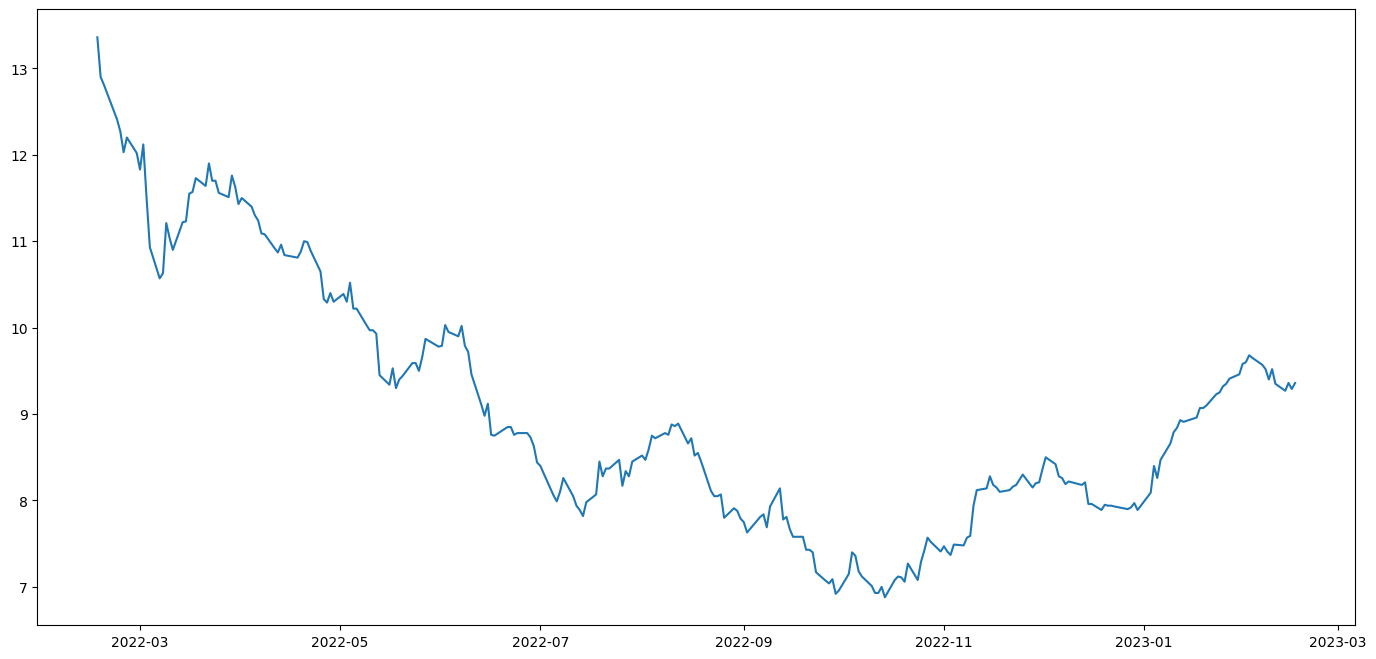

In [14]:
%matplotlib inline
plt.figure(figsize=(17,8))
plt.plot(data)
plt.grid(False)
plt.show()

# Moving Average

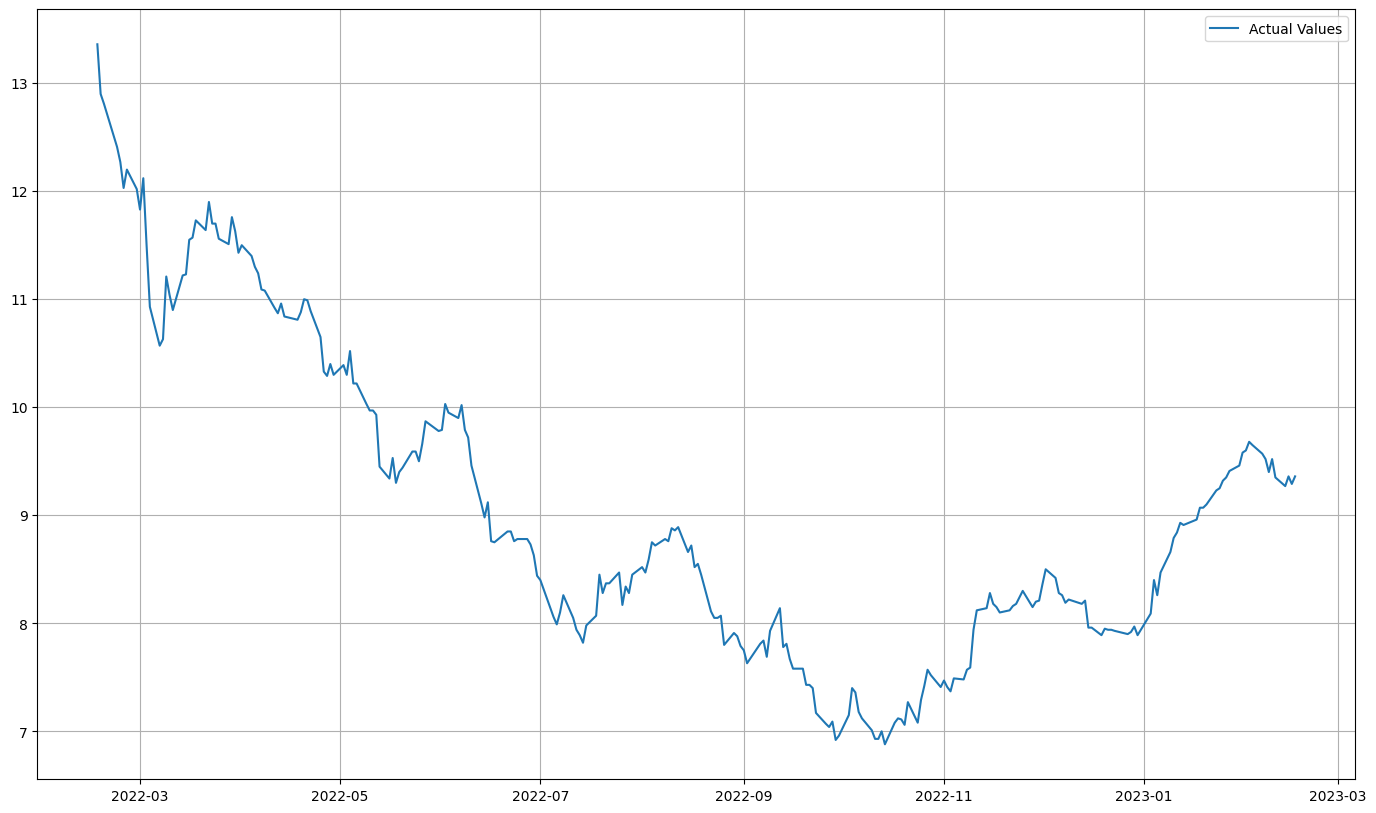

In [29]:
def plot_moving_average(data,window,scale=1.96):
    rolling_mean = data.rolling(window=window).mean()
    plt.figure(figsize=(17,10))
    plt.title('Moving average for window size={}'.format(window))
    plt.plot(rolling_mean)
    plt.grid(True)

plt.figure(figsize=(17,10))
plt.plot(data, label='Actual Values')
plt.legend(loc = 'best')
plt.grid(True)

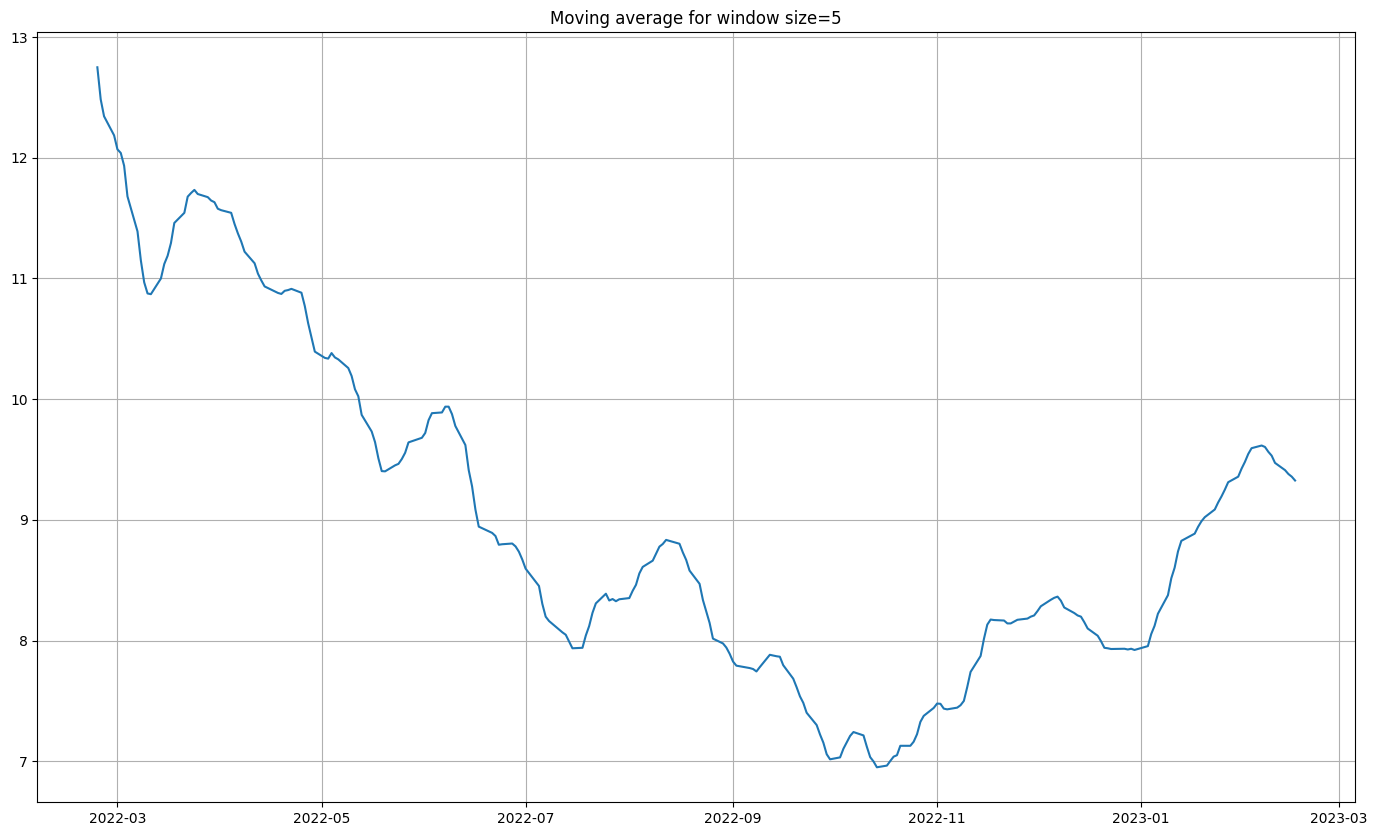

In [30]:
plot_moving_average(data.Close,5)

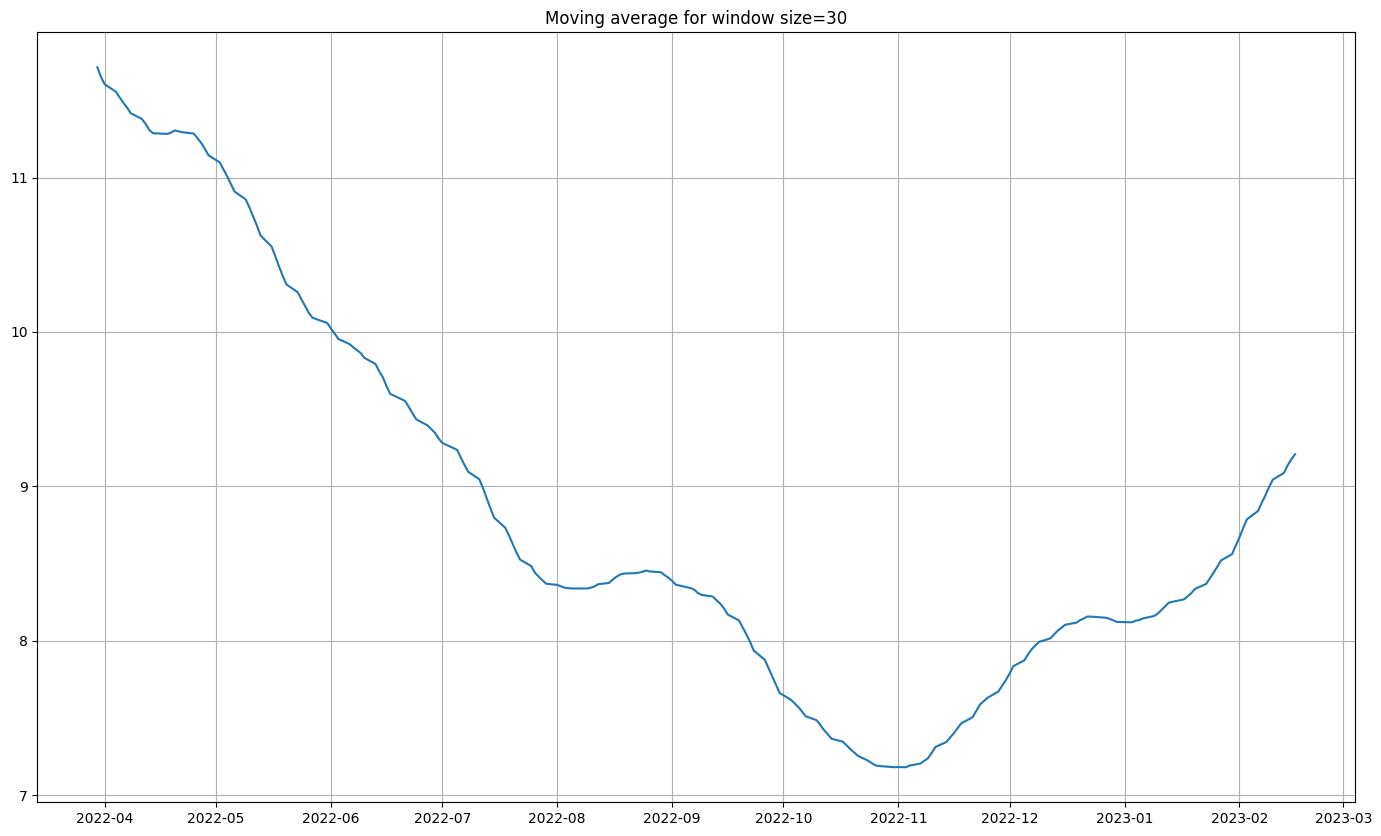

In [31]:
plot_moving_average(data.Close,30)

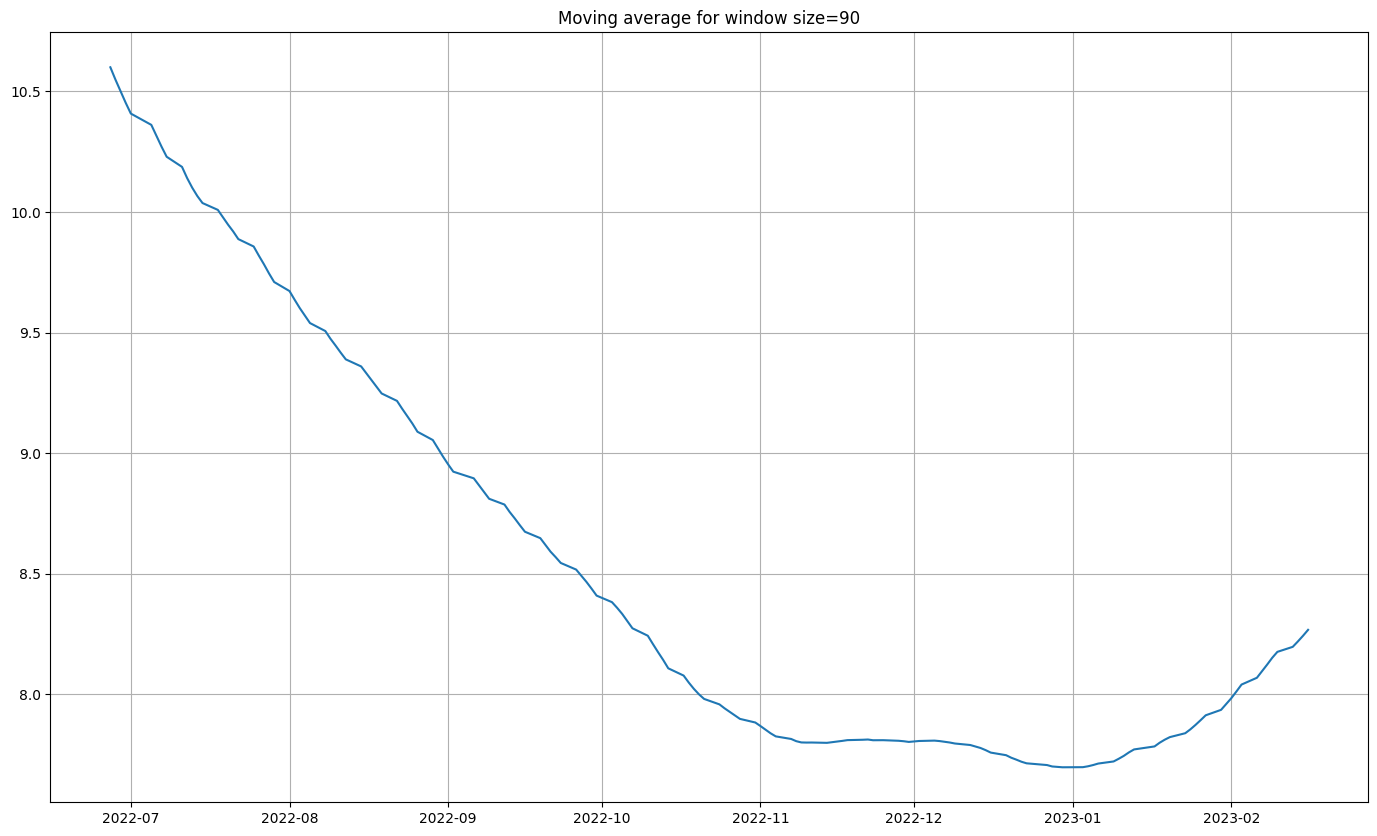

In [32]:
plot_moving_average(data.Close,90)

In [37]:
# plot intervals true
def plot_rolling_mean(data,window,plot_intervals=False,scale=1.96):
    rolling_mean = data.rolling(window=window).mean()
    plt.figure(figsize=(17,10))
    plt.title('Moving average for window size={}'.format(window))
    plt.plot(rolling_mean)
    plt.grid(True)
    if plot_intervals:
        mae = mean_absolute_error(data[window:], rolling_mean[window:])
        deviation = np.std(data[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae+scale*deviation)
        upper_bound = rolling_mean + (mae+scale*deviation)
        plt.plot(upper_bound, 'r--')
        plt.plot(lower_bound, 'r--')

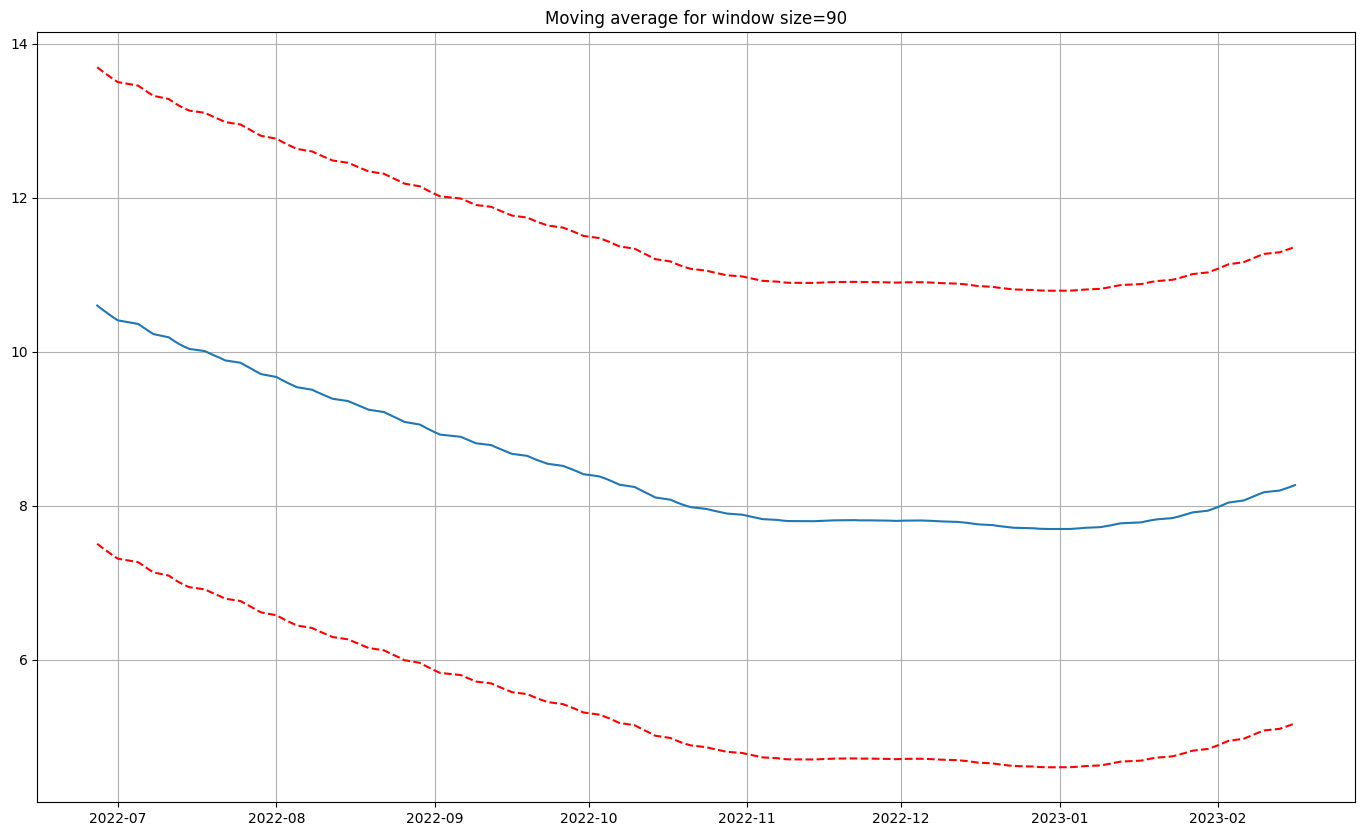

In [38]:
plot_rolling_mean(data.Close,90,plot_intervals=True)

# Exponential Smoothing

In [49]:
def exponential_smoothing(data,alpha):
    result = [data[0]]
    for n in range(1,len(data)):
        result.append(alpha*data[n]+(1-alpha)*result[n-1])
    return result
def plot_exponential_smoothing(data,alphas):
    plt.figure(figsize=(17,10))
    for alpha in alphas:
        plt.plot(exponential_smoothing(data,alpha),label = 'Alpha={}'.format(alpha))
        plt.plot(data.values,'c')
        plt.axis('tight')
        plt.grid(True)


        

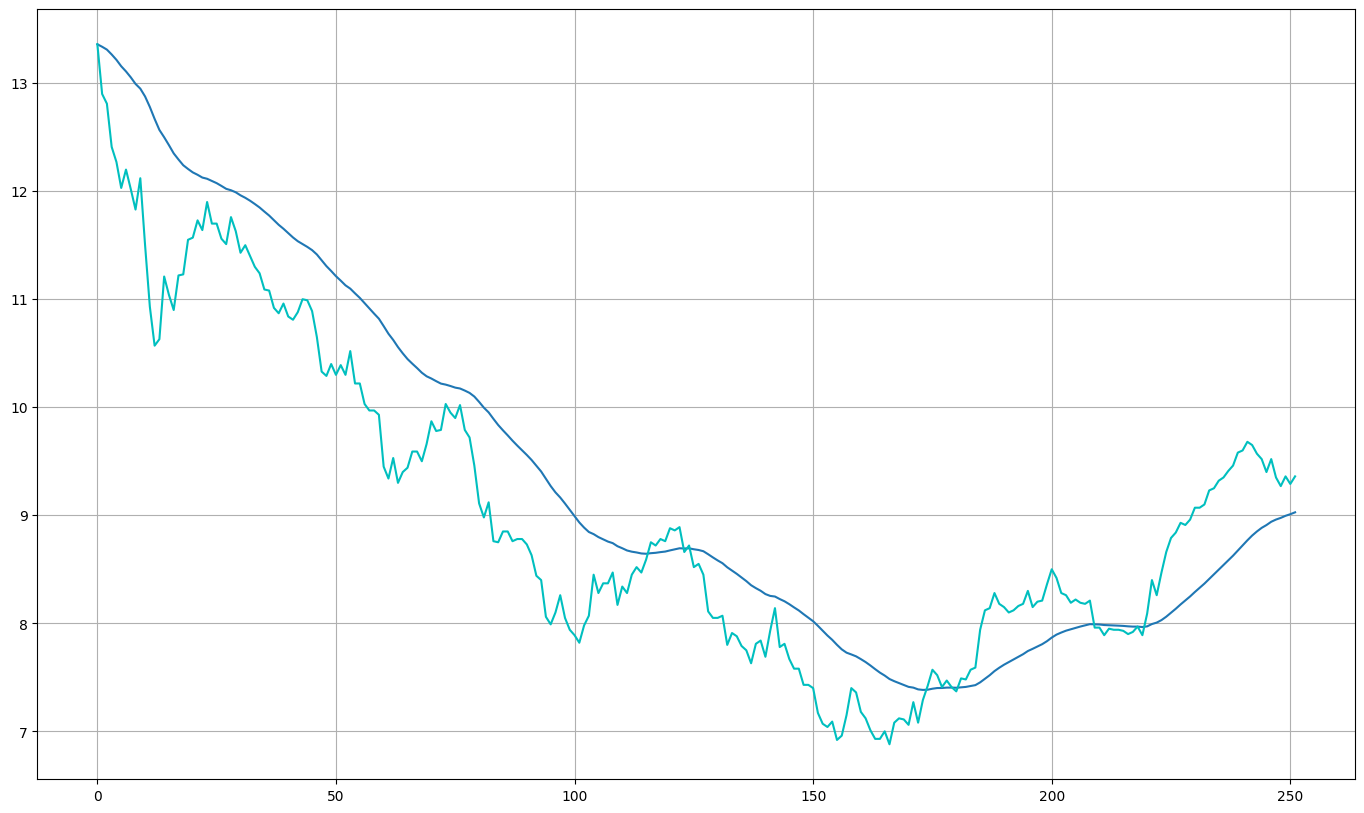

In [50]:
plot_exponential_smoothing(data.Close,[0.05])

# Double Exponential Smoothing

In [55]:
def double_exponential_smoothing(data,alpha,beta):
    result = [data[0]]
    for n in range(1,len(data)):
        if n==1:
            level,trend = data[1], data[1]-data[0]
        if n>=len(data):
            value = result[-1]
        else:
            value = data[n]
    last_level,level = level,alpha*value + (1-alpha)*(level+trend)
    trend = beta*(level - last_level) + (1-beta) * trend
    result.append(level+trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta),label="Alpha {},beta{}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

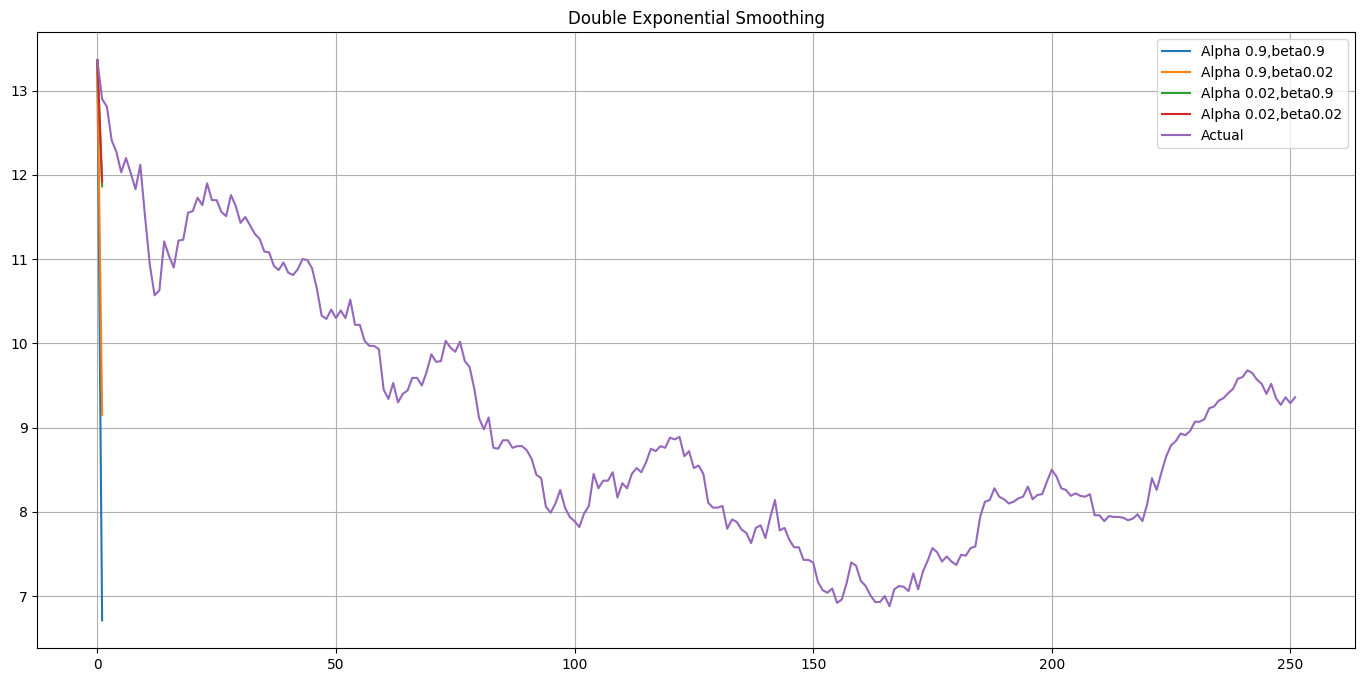

In [56]:
plot_double_exponential_smoothing(data.Close,[0.9,0.02],[0.9,0.02])